# 2.4 Exercises

This notebook file is intended to be a solution set of the exercises with translation of the R code included in Chapter 2.


## Installation
There are multiple ways to get a notebook environment working. The easiest is probably to install Anaconda and work off of that premade setup.

However, I personally recommend using ASDF to install versions of Python and using Poetry to manage package dependencies. This is because I tend to use separate environments for each project I'm working on (including this one) and I previously had problems with `conda` installs.

Please look at the README.md in the base of the repository to see how to install things.


## Import necessary libraries
Python is handy but doesn't appear to have the same functionality as built into R. To better address matrix math and statistical calculations, I will be using numpy, pandas, and scipy (specifically the stats module from scipy)

In [1]:
import pandas as pd

### Problem Number 8
Uses `College` dataset in `College.csv`

From the problem statement, the variables are defined as: 

• Private : Public/private indicator

• Apps : Number of applications received

• Accept : Number of applicants accepted

• Enroll : Number of new students enrolled

• Top10perc : New students from top 10 % of high school class

• Top25perc : New students from top 25 % of high school class

• F.Undergrad : Number of full-time undergraduates

• P.Undergrad : Number of part-time undergraduates

• Outstate : Out-of-state tuition

• Room.Board : Room and board costs

• Books : Estimated book costs

• Personal : Estimated personal spending

• PhD : Percent of faculty with Ph.D.’s

• Terminal : Percent of faculty with terminal degree

• S.F.Ratio : Student/faculty ratio

• perc.alumni : Percent of alumni who donate

• Expend : Instructional expenditure per student

• Grad.Rate : Graduation rate

(a) Use the read.csv() function to read the data into R. Call the
loaded data college. Make sure that you have the directory set
to the correct location for the data.

(b) Look at the data using the View() function. You should notice
that the first column is just the name of each university. We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:

In [5]:
# load data 
college_datapath  = '../data/College.csv'

#a#
college_dataframe = pd.read_csv(college_datapath)

#b#
college_dataframe.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [6]:
# List the columns in the dataframe
college_dataframe.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [7]:
# The college names are stored in Pandas as a column named "Unnamed: 0"
college_names_dataframe = college_dataframe['Unnamed: 0']
college_dataframe = college_dataframe.drop(['Unnamed: 0'], axis=1)
print(college_names_dataframe.head())
print(college_dataframe.head())

0    Abilene Christian University
1              Adelphi University
2                  Adrian College
3             Agnes Scott College
4       Alaska Pacific University
Name: Unnamed: 0, dtype: object
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869   

(c) i. Use the `describe()` function to produce a numerical summary
of the variables in the data set.

In [8]:
college_dataframe.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(c) ii. Use the `plotting.scatter_matrix()` function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
`A.iloc[1:10]`.

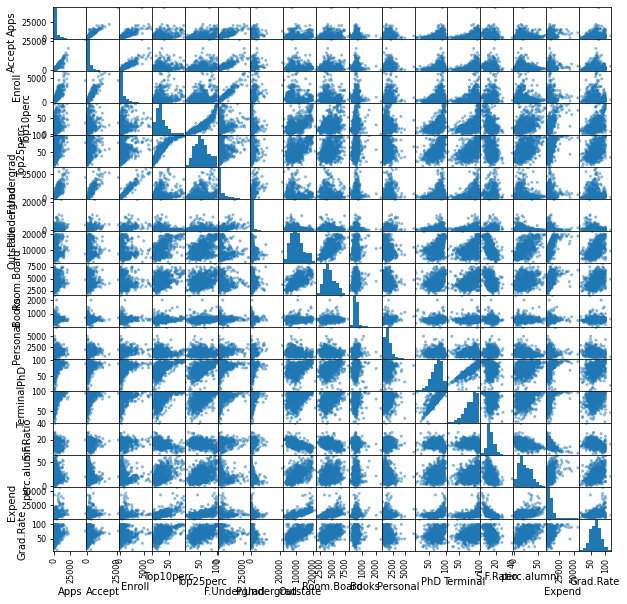

In [13]:
pd.plotting.scatter_matrix(college_dataframe, figsize=(10,10));

(c) iii. Use the `boxplot()` function to produce side-by-side boxplots of
Outstate versus Private.

<AxesSubplot:title={'center':'Outstate'}, xlabel='[Private]'>

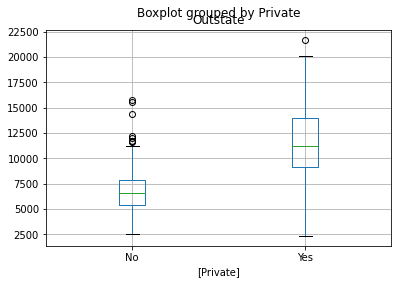

In [14]:
college_dataframe.boxplot(column=["Outstate"], by=['Private']);

(c) 
iv. Create a new qualitative variable, called `Elite`, by binning
the `Top10perc` variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10 % of their high school
classes exceeds 50 %.

```> Elite <- rep ("No", nrow (college))```

```> Elite[college$Top10perc > 50] <- " Yes "```

```> Elite <- as. factor (Elite)```

```> college <- data . frame (college , Elite)```

Use the `shape` function to see how many elite universities there are. Now use the `boxplot()` function to produce
side-by-side boxplots of Outstate versus Elite.

In [15]:
college_dataframe['Elite'] = college_dataframe['Top10perc'] > 50
college_dataframe['Elite']

0      False
1      False
2      False
3       True
4      False
       ...  
772    False
773    False
774    False
775     True
776    False
Name: Elite, Length: 777, dtype: bool

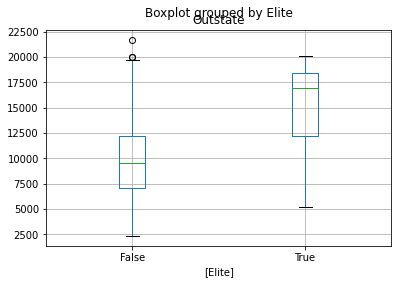

In [16]:
college_dataframe.boxplot(column=["Outstate"], by=['Elite']);

(c) v. Use the `hist()` function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. 

The original question stated: 

```You may find the command par(mfrow = c(2, 2))
useful: it will divide the print window into four regions so
that four plots can be made simultaneously. Modifying the
arguments to this function will divide the screen in other
ways.```

However, pandas histogram plotting already dynamically and automatically assigns the number of bins for each variable, and plots all of the histograms simultaneously.


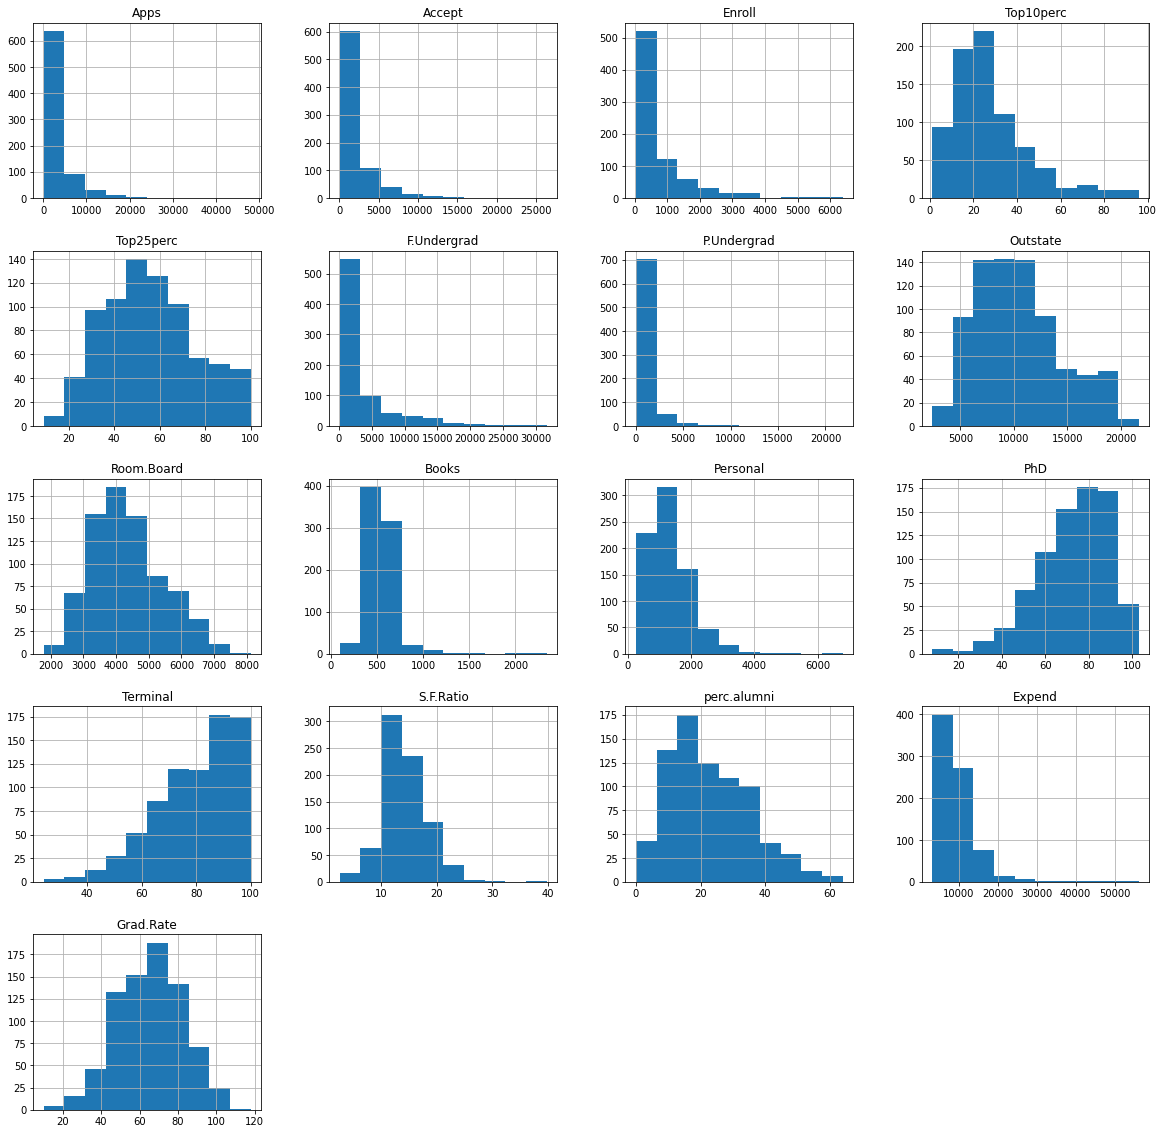

In [18]:
college_dataframe.hist(figsize=(20,20));

(c) vi. Continue exploring the data, and provide a brief summary
of what you discover.

---

## Problem Number 9
Uses `Auto` dataset from lab, make sure that the missing values have been removed from the data

In [26]:
# Load data
auto_data_path = "../data/Auto.csv"
auto_dataframe = pd.read_csv(auto_data_path)

# Use the cleaning from the lab
cleaned = auto_dataframe[auto_dataframe['horsepower'] != '?']
cleaned['cylinders'] = cleaned['cylinders'].astype('object')
cleaned['origin'] = cleaned['origin'].astype('object')
cleaned['horsepower'] = cleaned['horsepower'].astype('float64')

# Display the dataframe
cleaned.head()

/tmp/ipykernel_2097/2109680817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['cylinders'] = cleaned['cylinders'].astype('object')
/tmp/ipykernel_2097/2109680817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['origin'] = cleaned['origin'].astype('object')
/tmp/ipykernel_2097/2109680817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(a) Which of the predictors are quantitative, and which are qualitative?

Quantitative:
1. mpg
2. displacement
3. horsepower
4. weight
5. acceleration
6. year

Qualitative
1. cylinders
2. origin

(b) What is the range of each quantitative predictor? You can answer this using the `describe()` function. Or by using the `min()` and `max()` functions

In [27]:
cleaned.describe()

,mpg,displacement,horsepower,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [28]:
quantitative_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
for col in quantitative_cols:
    print(f"{col} minimum: " + str(cleaned[col].min()))
    print(f"{col} maximum: " + str(cleaned[col].max()))

mpg minimum: 9.0
mpg maximum: 46.6
displacement minimum: 68.0
displacement maximum: 455.0
horsepower minimum: 46.0
horsepower maximum: 230.0
weight minimum: 1613
weight maximum: 5140
acceleration minimum: 8.0
acceleration maximum: 24.8
year minimum: 70
year maximum: 82


(c) What is the mean and standard deviation of each quantitative
predictor? This is also in `describe()` but you can use `mean()` and `std()`.

In [29]:
for col in quantitative_cols:
    print(f"{col} mean: " + str(cleaned[col].mean()))
    print(f"{col} standard deviation: " + str(cleaned[col].std()))

mpg mean: 23.445918367346938
mpg standard deviation: 7.8050074865717995
displacement mean: 194.41198979591837
displacement standard deviation: 104.64400390890466
horsepower mean: 104.46938775510205
horsepower standard deviation: 38.49115993282849
weight mean: 2977.5841836734694
weight standard deviation: 849.4025600429492
acceleration mean: 15.541326530612244
acceleration standard deviation: 2.758864119188082
year mean: 75.9795918367347
year standard deviation: 3.6837365435778295


(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [30]:
cleaned.shape

(392, 9)

In [31]:
# To get subset, we'll use the drop function to exclude rows 10 to 85
subset = cleaned.drop(cleaned.index[10:84])
subset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [33]:
subset.describe()

,mpg,displacement,horsepower,weight,acceleration,year
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,24.338994,188.389937,101.235849,2942.506289,15.695597,77.110063
std,7.885977,100.424205,36.185088,812.971260,2.719850,3.130771
min,11.000000,68.000000,46.000000,1649.000000,8.500000,70.000000
25%,18.000000,102.000000,75.000000,2216.000000,14.000000,75.000000
50%,23.900000,146.000000,90.500000,2797.500000,15.500000,77.000000
75%,30.500000,256.000000,115.000000,3523.750000,17.275000,80.000000
max,46.600000,455.000000,230.000000,4997.000000,24.800000,82.000000


(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.



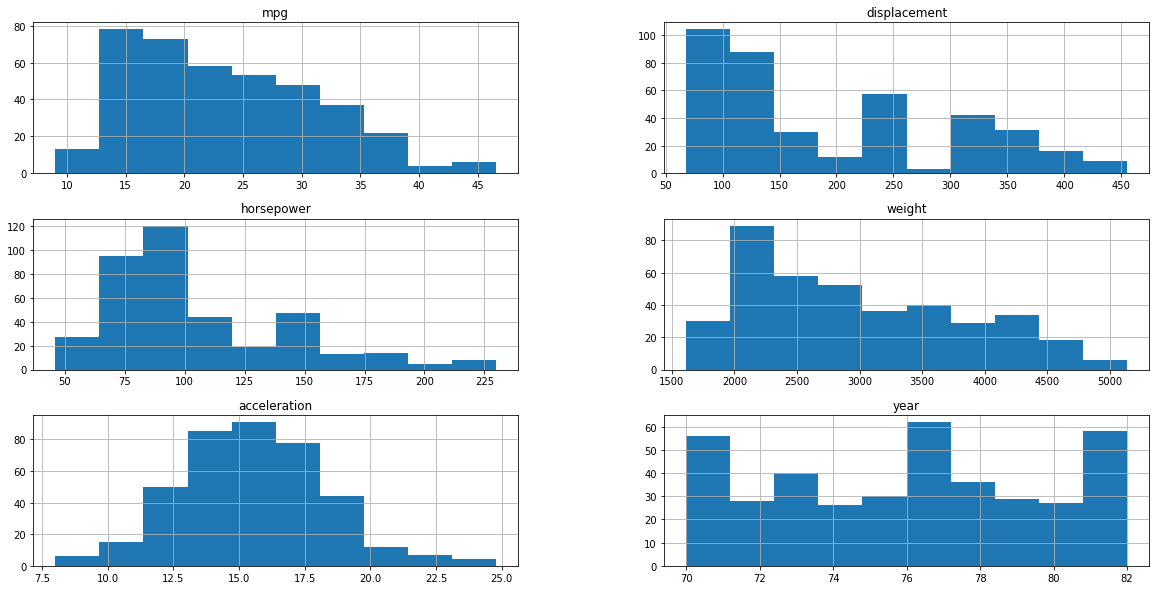

In [34]:
cleaned.hist(figsize=(20,10));

In [35]:
cleaned.corr()

,mpg,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.580541
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.369855,-0.416361,-0.309120,0.290316,1.000000


(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

Really quick look, it seems like the slower a car is, the better the MPG. Also the newer it is, the better the mpg, but none of these are scaled

## Problem Number 10
Uses `Boston` housing dataset

(a) To begin, load in the Boston data set. The Boston data set is
part of the ISLR2 library. 

For the original problem set, the following applies:

> library (ISLR2)

Now the data set is contained in the object Boston.

> Boston

Read about the data set:

> ?Boston

How many rows are in this data set? How many columns? What
do the rows and columns represent?

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.


But we're just loading the CSV and are missing the metadata/explanation

In [36]:
# Load data
boston_data_path = "../data/Boston.csv"
boston_dataframe = pd.read_csv(boston_data_path)
boston_dataframe

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [38]:
boston_dataframe.shape

(506, 14)

There are 506 rows and 13 columns. Remember the first column is actually an index. We could use the reindex function to make the unnamed column our true index, but that isn't necessar for now

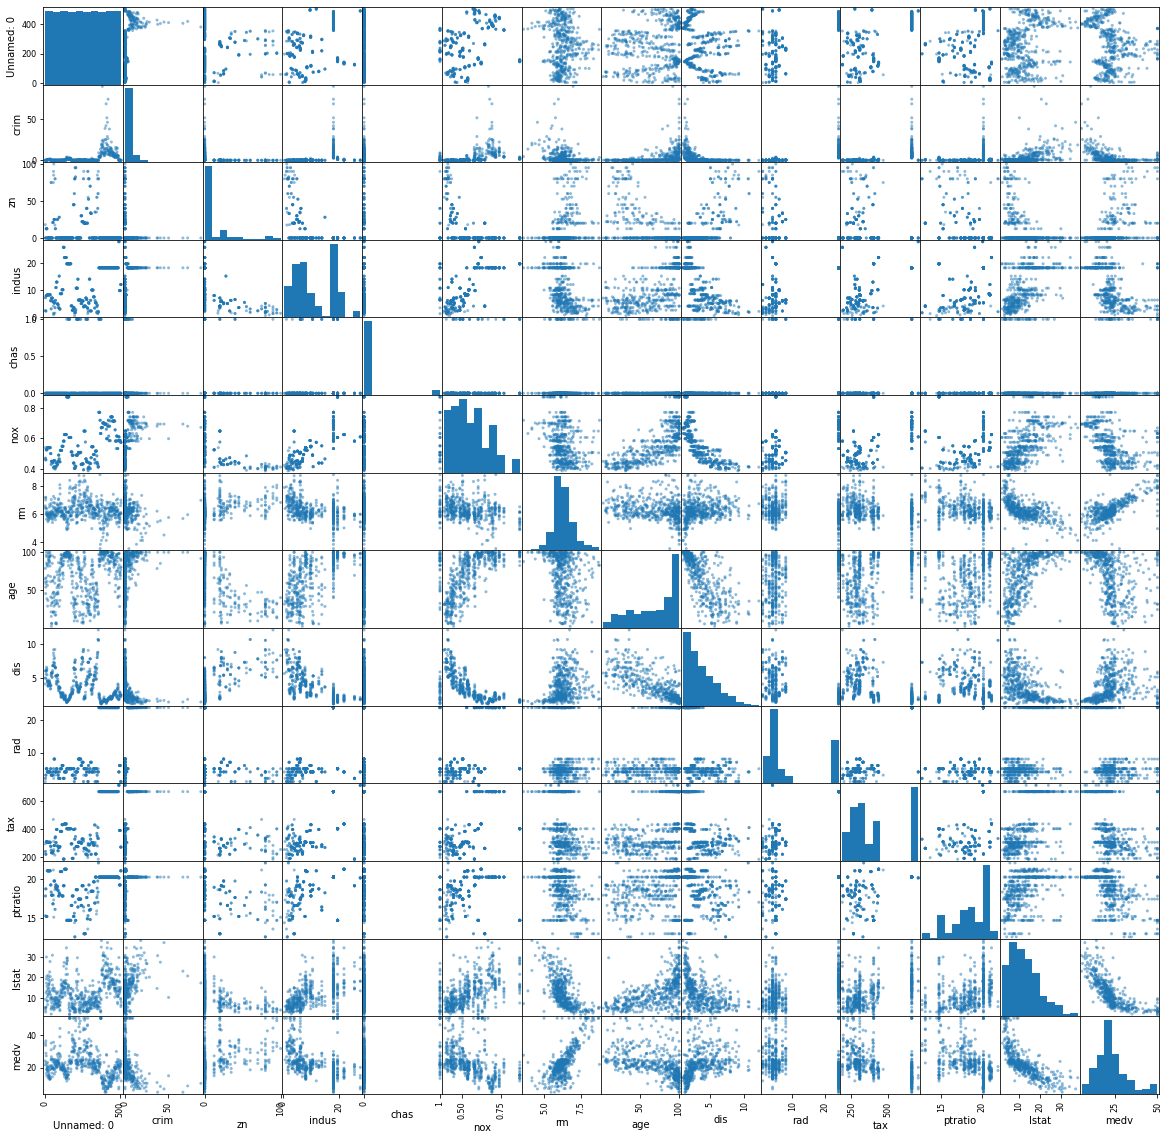

In [37]:
pd.plotting.scatter_matrix(boston_dataframe, figsize=(20,20));


(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.


In [40]:
boston_dataframe.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


Looks like Rad, Tax, lstat, nox, Indus 

It actually might be better to drop the Unnamed: 0 column since I wonder if the correlations would be better without that column in (I would think not, but without trying, it's hard to know)

(d) Do any of the census tracts of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.


In [46]:
boston_dataframe.sort_values(by='crim', ascending=False)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,381,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
418,419,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
405,406,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
410,411,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
414,415,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81,35.4
341,342,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,5.49,32.7
285,286,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
284,285,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,7.85,32.2


(e) How many of the census tracts in this data set bound the Charles
river?


In [47]:
boston_dataframe['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

35

(f) What is the median pupil-teacher ratio among the towns in this
data set?


In [48]:
boston_dataframe['ptratio'].median()

19.05

(g) Which census tract of Boston has lowest median value of owner occupied homes? What are the values of the other predictors
for that census tract, and how do those values compare to the
overall ranges for those predictors? Comment on your findings.


In [54]:
boston_dataframe.sort_values(by='medv')

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,399,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,406,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
400,401,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,26.77,5.6
399,400,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,29.97,6.3
414,415,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,167,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,3.70,50.0
195,196,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,2.97,50.0
283,284,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,3.16,50.0
225,226,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,4.63,50.0


(h) In this data set, how many of the census tracts average more
than seven rooms per dwelling? More than eight rooms per
dwelling? Comment on the census tracts that average more than
eight rooms per dwelling.

In [56]:
boston_dataframe[boston_dataframe['rm']>7].shape[0]

64

In [59]:
boston_dataframe[boston_dataframe['rm']>8].shape[0]

13

In [60]:
boston_dataframe[boston_dataframe['rm']>8].describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,232.307692,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,60.915768,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,98.000000,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,225.000000,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,233.000000,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,258.000000,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,365.000000,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
